# Analyse TF-IDF du df_final

1. **Réaliser un TF-IDF** sur l'ensemble des `cases_texte` du `df_final`.
2. **Tenter de prédire** la colonne `major_mesh_terms` à partir du TF-IDF.

# Import data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Barre de progression pour Jupyter
pd.set_option('display.max_colwidth', None)
import s3fs


In [2]:
if os.path.exists("../data/df_target_V2.pkl"):
    df = pd.read_pickle('../data/df_target_V2.pkl')

if os.path.exists("data/df_metadata"):
    df_metadata = pd.read_parquet('../data/df_metadata')

In [3]:
os.environ["AWS_ACCESS_KEY_ID"] = 'TX7EAFIX4BX0YG40M0HS'
os.environ["AWS_SECRET_ACCESS_KEY"] = '6u6aMhddxRy+JkoE1+Gb53Rf+PqPync9xgyO6q3W'
os.environ["AWS_SESSION_TOKEN"] = 'eyJhbGciOiJIUzUxMiIsInR5cCI6IkpXVCJ9.eyJhY2Nlc3NLZXkiOiJUWDdFQUZJWDRCWDBZRzQwTTBIUyIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sImF1ZCI6WyJtaW5pby1kYXRhbm9kZSIsIm9ueXhpYSIsImFjY291bnQiXSwiYXV0aF90aW1lIjoxNzQyNTczNTU4LCJhenAiOiJvbnl4aWEiLCJlbWFpbCI6InF1ZW50aW4ubWFycmV0QGVuc2FlLmZyIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImV4cCI6MTc0MzYxMDc3OCwiZmFtaWx5X25hbWUiOiJNYXJyZXQiLCJnaXZlbl9uYW1lIjoiUXVlbnRpbiIsImdyb3VwcyI6WyJVU0VSX09OWVhJQSJdLCJpYXQiOjE3NDMwMDU5NzgsImlzcyI6Imh0dHBzOi8vYXV0aC5sYWIuc3NwY2xvdWQuZnIvYXV0aC9yZWFsbXMvc3NwY2xvdWQiLCJqdGkiOiJjYWQ4MDk4OS05ZTY4LTQ1MzAtODlhYS0wM2UxZTliZTg3ZGQiLCJsb2NhbGUiOiJmciIsIm5hbWUiOiJRdWVudGluIE1hcnJldCIsInBvbGljeSI6InN0c29ubHkiLCJwcmVmZXJyZWRfdXNlcm5hbWUiOiJxdWVudGluMTk5OSIsInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJvZmZsaW5lX2FjY2VzcyIsInVtYV9hdXRob3JpemF0aW9uIiwiZGVmYXVsdC1yb2xlcy1zc3BjbG91ZCJdfSwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFuYWdlLWFjY291bnQiLCJtYW5hZ2UtYWNjb3VudC1saW5rcyIsInZpZXctcHJvZmlsZSJdfX0sInJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIiwidW1hX2F1dGhvcml6YXRpb24iLCJkZWZhdWx0LXJvbGVzLXNzcGNsb3VkIl0sInNjb3BlIjoib3BlbmlkIHByb2ZpbGUgZ3JvdXBzIGVtYWlsIiwic2lkIjoiZTlmMWI0YzgtNTYwNC00M2UwLTk2NDUtZjM0M2Q2Y2U0NDVmIiwic3ViIjoiOGM1NjkxMjYtMGI2Mi00MGI0LTg4ZDAtMWFhYzgyMTJiOGE5IiwidHlwIjoiQmVhcmVyIn0.Gl-pro2vlaMpQZiX9x1b9ngp10WD8yH8_KIi8VqofdmnaJ67cdOyIEQ_2NJ-V-XZAjSCC6fC8L7sD8POngUs6g'
os.environ["AWS_DEFAULT_REGION"] = 'us-east-1'
fs = s3fs.S3FileSystem(
    client_kwargs={'endpoint_url': 'https://'+'minio.lab.sspcloud.fr'},
    key = os.environ["AWS_ACCESS_KEY_ID"], 
    secret = os.environ["AWS_SECRET_ACCESS_KEY"], 
    token = os.environ["AWS_SESSION_TOKEN"])

In [4]:
print(repr(os.getenv("AWS_ACCESS_KEY_ID")))
print(repr(os.getenv("AWS_SECRET_ACCESS_KEY")))

'TX7EAFIX4BX0YG40M0HS'
'6u6aMhddxRy+JkoE1+Gb53Rf+PqPync9xgyO6q3W'


raise RuntimeError("⛔ Cette cellule ne doit pas être exécutée.")

#Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

BUCKET_OUT = "s3://quentin1999/Data_Projet_NLP"
FILE_KEY_OUT_S3 = "df_final"
FILE_PATH_OUT_S3 = BUCKET_OUT + "/" + FILE_KEY_OUT_S3

with fs.open(FILE_PATH_OUT_S3, 'w') as file_out:
    df.to_csv(file_out)

In [5]:
fs.ls("s3://quentin1999/Data_Projet_NLP")

PermissionError: The Access Key Id you provided does not exist in our records.

In [ ]:
if not os.path.exists("../data/df_target_V2.pkl"):
    BUCKET = "s3://quentin1999/Data_Projet_NLP"
    FILE_KEY_S3 = "df_target_V2.pkl"
    FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

    with fs.open(FILE_PATH_S3, mode="rb") as file_in:
        df = pd.read_pickle(file_in)

    print("✅ Fichier chargé avec succès, shape :", df.shape)

    df.to_pickle("data/df_target_V2.pkl")

    print("✅ Fichier sauvegardé avec succès dans le dossier data")

PermissionError: Forbidden

## Afficher nuage de mot avec WordCloud

In [ ]:
df.shape

NameError: name 'df' is not defined

In [ ]:
text_brut = str(df['case_text'])

In [ ]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')


#stop_words = set(stopwords.words('english'))
#text_brut = [word for word in text_brut if word not in stop_words]

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

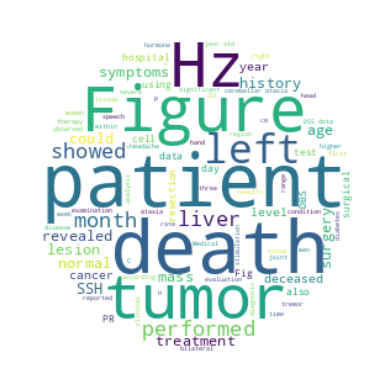

In [ ]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

STOPWORDS = set(stopwords.words('english'))

import matplotlib.pyplot as plt
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# plot a word cloud
text = str(df['case_text'])
wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords = STOPWORDS)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
import spacy
import scispacy
from scispacy.linking import EntityLinker
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the Med7 model
nlp = spacy.load("en_core_sci_sm")

# Ajouter un linker vers UMLS (si tu veux mapper les entités à des concepts médicaux précis)
linker = EntityLinker(resolve_abbreviations=True, name="umls")
nlp.add_pipe("scispacy_linker", config={"resolve_abbreviations": True, "linker_name": "umls"})

/opt/conda/lib/python3.12/site-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/data/linkers/2023-04-23/umls/tfidf_vectors_sparse.npz not found in cache, downloading to /tmp/tmpst745b2v


100%|██████████| 492M/492M [00:40<00:00, 12.6MiB/s]  


Finished download, copying /tmp/tmpst745b2v to cache at /home/onyxia/.scispacy/datasets/2b79923846fb52e62d686f2db846392575c8eb5b732d9d26cd3ca9378c622d40.87bd52d0f0ee055c1e455ef54ba45149d188552f07991b765da256a1b512ca0b.tfidf_vectors_sparse.npz
https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/data/linkers/2023-04-23/umls/nmslib_index.bin not found in cache, downloading to /tmp/tmp3mq0jzeo


100%|██████████| 724M/724M [00:39<00:00, 19.4MiB/s]  


Finished download, copying /tmp/tmp3mq0jzeo to cache at /home/onyxia/.scispacy/datasets/7e8e091ec80370b87b1652f461eae9d926e543a403a69c1f0968f71157322c25.6d801a1e14867953e36258b0e19a23723ae84b0abd2a723bdd3574c3e0c873b4.nmslib_index.bin
https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/data/linkers/2023-04-23/umls/tfidf_vectorizer.joblib not found in cache, downloading to /tmp/tmpbl3_k04v


100%|██████████| 1.32M/1.32M [00:00<00:00, 1.58MiB/s]
/opt/conda/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.1.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.1.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Finished download, copying /tmp/tmpbl3_k04v to cache at /home/onyxia/.scispacy/datasets/37bc06bb7ce30de7251db5f5cbac788998e33b3984410caed2d0083187e01d38.f0994c1b61cc70d0eb96dea4947dddcb37460fb5ae60975013711228c8fe3fba.tfidf_vectorizer.joblib
https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/data/linkers/2023-04-23/umls/concept_aliases.json not found in cache, downloading to /tmp/tmpu1_jche6


100%|██████████| 264M/264M [00:14<00:00, 18.5MiB/s] 


Finished download, copying /tmp/tmpu1_jche6 to cache at /home/onyxia/.scispacy/datasets/6238f505f56aca33290aab44097f67dd1b88880e3be6d6dcce65e56e9255b7d4.d7f77b1629001b40f1b1bc951f3a890ff2d516fb8fbae3111b236b31b33d6dcf.concept_aliases.json
https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/data/kbs/2023-04-23/umls_2022_ab_cat0129.jsonl not found in cache, downloading to /tmp/tmpeh7j2in5


100%|██████████| 628M/628M [00:33<00:00, 19.7MiB/s]  


Finished download, copying /tmp/tmpeh7j2in5 to cache at /home/onyxia/.scispacy/datasets/d5e593bc2d8adeee7754be423cd64f5d331ebf26272074a2575616be55697632.0660f30a60ad00fffd8bbf084a18eb3f462fd192ac5563bf50940fc32a850a3c.umls_2022_ab_cat0129.jsonl


In [ ]:
# Échantillon aléatoire de 250 lignes (modifiable)
sample_df = df.sample(n=250, random_state=42)
text = " ".join(sample_df['case_text'].astype(str))

# Applique le modèle NLP sur tout le texte d’un coup (plus rapide et propre)
doc = nlp(text)

# Récupère les entités détectées
medical_terms = [ent.lemma_.lower() for ent in doc.ents]

# Ajoute des mots personnalisés si besoin
additional_terms = ["one", "two", "three", "day", "daily", "month"]
medical_terms.extend(additional_terms)

In [ ]:
from collections import Counter

# Compte les occurrences des termes médicaux
term_counts = Counter(medical_terms)

# Affiche les 20 termes les plus fréquents
most_common_terms = term_counts.most_common(20)

# Affichage propre
print("Top 20 des termes médicaux les plus fréquents :")
for term, count in most_common_terms:
    print(f"{term}: {count}")

Top 20 des termes médicaux les plus fréquents :
patient: 1018
day: 342
month: 319
year: 193
treatment: 177
level: 158
week: 155
negative: 145
increase: 138
lesion: 137
case: 135
figure: 128
positive: 125
diagnosis: 119
patient's: 112
finding: 97
admission: 94
symptom: 93
surgery: 92
hospital: 88
decrease: 88
study: 85
physical examination: 85
age: 85
detect: 83
examination: 82
diagnose: 79
tumor: 77
follow-up: 75
result: 66
male: 65
mass: 65
size: 64
datum: 64
severe: 63
history: 63
elevated: 63
bilateral: 61
mri: 60
female: 60


In [ ]:
# Génère le nuage de mots
medical_bagofwords = " ".join(medical_terms)
print(medical_terms)

wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords=STOPWORDS)
wc.generate(medical_bagofwords)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Statistiques

In [ ]:
df = pd.read_pickle('data/df_target_V2.pkl')

In [ ]:
df.target.head(3)

0        [False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False]
1    [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
2      [True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Name: target, dtype: object

In [ ]:
df['target'][4]

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False])

In [ ]:
# On convertit chaque élément en array bool explicite
target_array = np.vstack(df['target'].apply(lambda x: np.array(x, dtype=bool)))

# Somme par colonne
column_sums = target_array.sum(axis=0)

print(column_sums)

[2343    0    0 2998 1008 1519  392 1567  261 2136  667 1373    0 1936
 1305 1430 1387  850  940 1570    0    7 2860   28  214  576]


## Bag-of-word representation

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset, create X (features) and y (target), print the size
data_train, data_dev_test = train_test_split(df ,test_size=0.20, random_state=42)
data_dev, data_test = train_test_split(data_dev_test ,test_size=0.5, random_state=42)

print ('train size',data_train.shape)
print ('dev size', data_dev.shape)
print ('test size', data_test.shape)
# create features X and target y
X_train = data_train.case_text
X_dev = data_dev.case_text
X_test = data_test.case_text
y_train = data_train.target
y_dev = data_dev.target
y_test = data_test.target

train size (8574, 12)
dev size (1072, 12)
test size (1072, 12)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

document = df.case_text

vectorizer = CountVectorizer(max_features=1000)
#vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=3000)
# fit on train data
vectorizer.fit(X_train)

# Apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [ ]:
vectorizer

CountVectorizer(max_features=1000)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Initiate the model
# Définition du modèle multi-label simple avec Logistic Regression
model = OneVsRestClassifier(LogisticRegression(solver='liblinear'))

# Train
model.fit(X_train_counts, np.vstack(y_train.values))
y_pred = (model.predict_proba(X_test_counts) > 0.5).astype(int)

/opt/conda/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 12 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 20 is present in all training examples.
  warnings.warn(


In [ ]:
from sklearn.metrics import f1_score, hamming_loss, classification_report
import numpy as np

# 1. Conversion correcte de y_test (stocké sous forme de vecteurs dans une colonne)
y_test_array = np.vstack(y_test.values)

# 2. Calcul des métriques
f1_micro = f1_score(y_test_array, y_pred, average='micro')
f1_macro = f1_score(y_test_array, y_pred, average='macro')
hamming = hamming_loss(y_test_array, y_pred)

# 3. Affichage des métriques globales
print(f"F1 micro       : {f1_micro:.4f}")
print(f"F1 macro       : {f1_macro:.4f}")
print(f"Hamming loss   : {hamming:.4f}")

# 4. Classification report
print("\nClassification Report :")
print(classification_report(y_test_array, y_pred, zero_division=0))

F1 micro       : 0.5449
F1 macro       : 0.3716
Hamming loss   : 0.0845

Classification Report :
              precision    recall  f1-score   support

           0       0.68      0.59      0.64       227
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.78      0.73      0.76       334
           4       0.45      0.45      0.45        97
           5       0.66      0.51      0.57       176
           6       0.29      0.33      0.31        42
           7       0.58      0.59      0.58       160
           8       0.31      0.42      0.36        31
           9       0.68      0.61      0.64       206
          10       0.59      0.60      0.59        67
          11       0.53      0.48      0.50       129
          12       0.00      0.00      0.00         0
          13       0.74      0.63      0.68       208
          14       0.55      0.50      0.52       119
          15       0.47      0.33     

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Essai avec TF-IDF ngram = 2

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

document = df.case_text


vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
# fit on train data
vectorizer.fit(X_train)

# Apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [ ]:
# Initiate the model
# Définition du modèle multi-label simple avec Logistic Regression
model = OneVsRestClassifier(LogisticRegression(solver='liblinear'))

# Train
model.fit(X_train_counts, np.vstack(y_train.values))
y_pred = (model.predict_proba(X_test_counts) > 0.25).astype(int)

# 1. Conversion correcte de y_test (stocké sous forme de vecteurs dans une colonne)
y_test_array = np.vstack(y_test.values)

# 2. Calcul des métriques
f1_micro = f1_score(y_test_array, y_pred, average='micro')
f1_macro = f1_score(y_test_array, y_pred, average='macro')
hamming = hamming_loss(y_test_array, y_pred)

# 3. Affichage des métriques globales
print(f"F1 micro       : {f1_micro:.4f}")
print(f"F1 macro       : {f1_macro:.4f}")
print(f"Hamming loss   : {hamming:.4f}")

# 4. Classification report
print("\nClassification Report :")
print(classification_report(y_test_array, y_pred, zero_division=0))

/opt/conda/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 12 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 20 is present in all training examples.
  warnings.warn(


F1 micro       : 0.6669
F1 macro       : 0.4485
Hamming loss   : 0.0669

Classification Report :
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       227
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.80      0.86      0.83       334
           4       0.66      0.45      0.54        97
           5       0.82      0.75      0.78       176
           6       0.73      0.19      0.30        42
           7       0.75      0.76      0.75       160
           8       0.62      0.16      0.26        31
           9       0.66      0.75      0.70       206
          10       0.85      0.66      0.74        67
          11       0.69      0.67      0.68       129
          12       0.00      0.00      0.00         0
          13       0.80      0.73      0.76       208
          14       0.65      0.60      0.62       119
          15       0.54      0.48     

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# BERT

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Barre de progression pour Jupyter
pd.set_option('display.max_colwidth', None)

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.preprocessing import MultiLabelBinarizer
from datasets import Dataset

import torch
from sklearn.metrics import (
    f1_score, precision_score, recall_score, hamming_loss, accuracy_score
)

/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
df = pd.read_pickle('../data/df_target_V2.pkl')

In [9]:
print(torch.cuda.is_available())  # doit renvoyer True
print(torch.cuda.get_device_name(0))  # nom de ton GPU

True
NVIDIA A2


In [10]:
# Nom du modèle médical BERT
model_name = "emilyalsentzer/Bio_ClinicalBERT"

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tu dois définir le nombre de classes en sortie
n_labels = 26  # par exemple
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=n_labels,
    problem_type="multi_label_classification"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
from datasets import Dataset
df = df.rename(columns={"target": "labels"})
df["labels"] = df["labels"].apply(lambda x: np.array(x, dtype=np.float32))
dataset = Dataset.from_pandas(df)

# Tokenizer
def tokenize(batch):
    return tokenizer(batch["case_text"], padding="max_length", truncation=True, max_length=512)

dataset = dataset.map(tokenize, batched=True)

Map: 100%|██████████| 10718/10718 [00:05<00:00, 2000.11 examples/s]


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",              # évaluation à chaque époque
    save_strategy="epoch",                    # sauvegarde à chaque époque (utile pour reprise)
    save_total_limit=2,                       # limite le nombre de checkpoints
    learning_rate=3e-5,                       # légèrement augmenté pour convergence plus rapide
    per_device_train_batch_size=4,            # réduit à 4 pour éviter OOM (GPU 16 Go)
    per_device_eval_batch_size=4,
    num_train_epochs=5,                       # plus d'époques si dataset pas trop gros
    weight_decay=0.01,
    fp16=True,                                # active le mixed precision training (optimisé pour Ampere)
    gradient_accumulation_steps=4,            # simule un batch size plus grand (4x4 = 16)
    warmup_ratio=0.1,                         # warmup sur 10% des steps pour stabiliser l'entraînement
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,              # récupère le meilleur modèle (selon eval loss)
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    dataloader_num_workers=2,                 # légère parallélisation de l’I/O
    report_to="none",                         # désactive Weights & Biases si non utilisé
)

def exact_match_accuracy(y_true, y_pred):
    return np.all(y_true == y_pred, axis=1).mean()

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    thresholds = np.linspace(0.1, 0.99, 20)

    best_threshold = 0.5
    best_precision = 0

    for t in thresholds:
        preds = (logits >= t).astype(int)
        micro_precision = precision_score(labels, preds, average='micro', zero_division=0)
        if micro_precision > best_precision:
            best_precision = micro_precision
            best_threshold = t

    # Final prediction with the best threshold
    preds = (logits >= best_threshold).astype(int)

    return {
        'threshold': best_threshold,
        'micro_precision': precision_score(labels, preds, average='micro', zero_division=0),
        'micro_recall': recall_score(labels, preds, average='micro', zero_division=0),
        'micro_f1': f1_score(labels, preds, average='micro', zero_division=0),
        'hamming_loss': hamming_loss(labels, preds),
        'exact_match_accuracy': exact_match_accuracy(labels, preds)
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    eval_dataset=dataset,
    compute_metrics=compute_metrics
)

trainer.train()

ValueError: --load_best_model_at_end requires the save and eval strategy to match, but found
- Evaluation strategy: IntervalStrategy.NO
- Save strategy: SaveStrategy.STEPS

In [14]:
trainer.train(resume_from_checkpoint="./results/checkpoint-3350")

NameError: name 'trainer' is not defined

In [ ]:
metrics = trainer.evaluate()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
df = pd.DataFrame([metrics])
display(df)

,eval_loss,eval_threshold,eval_micro_precision,eval_micro_recall,eval_micro_f1,eval_hamming_loss,eval_exact_match_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
0,0.052049,0.99,0.994627,0.777871,0.872996,0.022227,0.564658,115.6827,92.65,23.167,5.0


In [ ]:
trainer.save_model("./mon_modele_final2")
tokenizer.save_pretrained("./mon_modele_final2")

('./mon_modele_final/tokenizer_config.json',
 './mon_modele_final/special_tokens_map.json',
 './mon_modele_final/vocab.txt',
 './mon_modele_final/added_tokens.json',
 './mon_modele_final/tokenizer.json')

| Étape                  | Outils                         | Ce que tu fais                            |
|------------------------|--------------------------------|--------------------------------------------|
| Choix du modèle        | HuggingFace `transformers`     | Utilise un BERT médical pré-entraîné       |
| Préparation des données| `datasets`, `tokenizer`        | Tokenisation + conversion des labels       |
| Modélisation           | `AutoModelForSequenceClassification` | Déclare une classification multi-label |
| Entraînement           | `Trainer`                      | Fine-tuning du modèle sur tes données      |
| Évaluation             | `f1_score`, `hamming_loss`     | Calcul des performances globales           |

In [ ]:
raise RuntimeError("⛔ Cette cellule ne doit pas être exécutée.")

# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

BUCKET_OUT = "s3://quentin1999/Data_Projet_NLP"
FILE_KEY_OUT_S3 = "df_target_V3.pkl"
FILE_PATH_OUT_S3 = BUCKET_OUT + "/" + FILE_KEY_OUT_S3

with fs.open(FILE_PATH_OUT_S3, 'wb') as file_out:
    df.to_pickle(file_out)

In [ ]:
raise RuntimeError("⛔ Cette cellule ne doit pas être exécutée.")

from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("./mon_modele_final")
tokenizer = AutoTokenizer.from_pretrained("./mon_modele_final")

## Enregistrer le modèle BERT trained

In [ ]:
import shutil
import zipfile

# === 1. Zippage du dossier ===
output_dir = "./mon_modele_final"
zip_path = "./mon_modele_final.zip"
shutil.make_archive(base_name="mon_modele_final", format='zip', root_dir=output_dir)

# === 2. Envoi vers S3 Vault ===
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

BUCKET_OUT = "s3://quentin1999/Data_Projet_NLP"
MODEL_ZIP_KEY = "mon_modele_final.zip"
MODEL_ZIP_PATH_S3 = BUCKET_OUT + "/" + MODEL_ZIP_KEY

with fs.open(MODEL_ZIP_PATH_S3, 'wb') as f_out:
    with open(zip_path, 'rb') as f_in:
        shutil.copyfileobj(f_in, f_out)

print("✅ Modèle sauvegardé dans le Vault S3 :", MODEL_ZIP_PATH_S3)

✅ Modèle sauvegardé dans le Vault S3 : s3://quentin1999/Data_Projet_NLP/mon_modele_final.zip


In [ ]:
# Téléchargement depuis S3
with fs.open(MODEL_ZIP_PATH_S3, 'rb') as f_in:
    with open("mon_modele_final.zip", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Dézippage
shutil.unpack_archive("mon_modele_final.zip", extract_dir="./mon_modele_final")

# Chargement
model = AutoModelForSequenceClassification.from_pretrained("./mon_modele_final")
tokenizer = AutoTokenizer.from_pretrained("./mon_modele_final")

In [ ]:
from sklearn.metrics import f1_score, hamming_loss
import numpy as np
import torch
from tqdm import tqdm

# 1. Mettre le modèle en mode évaluation
model.eval()

# Exemple si tu as X_test sous forme de textes
for batch in tqdm(X_test):  # ou DataLoader, selon ta structure
    inputs = tokenizer(batch, return_tensors="pt", truncation=True, padding=True).to(model.device)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits.cpu().numpy()
    y_pred_logits.append(logits)

# 3. Empiler les logits et binariser
y_pred_logits = np.vstack(y_pred_logits)         # (n_samples, n_classes)
y_pred = (y_pred_logits >= 0.5).astype(int)      # Seuil de 0.5 pour binariser

# 4. Évaluation (en supposant que y_test_array est déjà binairisé)
f1_micro = f1_score(y_test_array, y_pred, average='micro')
f1_macro = f1_score(y_test_array, y_pred, average='macro')
hamming = hamming_loss(y_test_array, y_pred)

print(f"✅ F1 Micro : {f1_micro:.4f}")
print(f"✅ F1 Macro : {f1_macro:.4f}")
print(f"🔁 Hamming Loss : {hamming:.4f}")

NameError: name 'X_test' is not defined